In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,MaxPooling1D,Conv1D,Flatten
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [ ]:
df = pd.read_csv('chl-sst.csv')
df = df.drop(columns='depth')
df = df.sort_values('time')
df

,time,CHL,thetao
200,01-01-2016,1.065941,27.905010
566,01-01-2017,1.233048,27.610973
931,01-01-2018,1.501524,27.341648
1296,01-01-2019,1.351403,27.047588
1661,01-01-2020,1.334833,27.507557
...,...,...,...
565,31-12-2016,1.531481,27.658436
930,31-12-2017,1.541319,27.205236
1295,31-12-2018,1.258931,27.356398
1660,31-12-2019,1.404935,27.341406


In [ ]:
num_features = ['CHL','thetao']
scaler = MinMaxScaler()
df[num_features] = scaler.fit_transform(df[num_features])
df_new = df[['time','CHL','thetao']]
df_new

,time,CHL,thetao
200,01-01-2016,0.093382,0.301205
566,01-01-2017,0.128301,0.258635
931,01-01-2018,0.184403,0.219643
1296,01-01-2019,0.153034,0.177070
1661,01-01-2020,0.149571,0.243663
...,...,...,...
565,31-12-2016,0.190664,0.265507
930,31-12-2017,0.192719,0.199894
1295,31-12-2018,0.133710,0.221779
1660,31-12-2019,0.164220,0.219608


In [ ]:
def create_seq(data, window_size):
  X = []
  y = []

  for i in range(window_size, len(data)):
    X.append(data[i-window_size:i, 1:]) # Select features (excluding 'time')
    y.append(data[i, 1:]) # Use array indexing instead of iloc
  return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

X,y = create_seq(df_new.values,30)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,302 (278.52 KB)

 Trainable params: 71,302 (278.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0526
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0196
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0127
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0112
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0098
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0097
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0095
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0089
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0087
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0101
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0087
Epoch 12/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0092
Epoch 13/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0088
Epoch 14/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0090
Epoch 15/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - lo

In [ ]:
pred = model.predict(X_test)
pred_inverse = scaler.inverse_transform(pred)
y_test_inverse = scaler.inverse_transform(y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [ ]:
lmse = mean_squared_error(y_test_inverse,pred_inverse)
lmae = mean_absolute_error(y_test_inverse,pred_inverse)
lmape = mean_absolute_percentage_error(y_test_inverse,pred_inverse)
lacc = 1-lmape

print(f'Mean Squared Error: {lmse}')
print(f'Root Mean Squared Error',np.sqrt(lmse))
print(f'Mean Absolute Error: {lmae}')
print(f'Mean Absolute Percentage Error: {lmape}')
print(f'Accuracy: {lacc}')

Mean Squared Error: 0.2785959541797638
Root Mean Squared Error 0.5278218962678262
Mean Absolute Error: 0.3707067370414734
Mean Absolute Percentage Error: 0.11163435876369476
Accuracy: 0.8883656412363052


In [ ]:
Model = Sequential()
Model.add(Conv1D(filters=64,kernel_size=3,activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
Model.add(MaxPooling1D(pool_size=2))
Model.add(Conv1D(filters=34,kernel_size=3,activation='relu'))
Model.add(MaxPooling1D(pool_size=2))
Model.add(Flatten())
Model.add(Dense(units=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
Model.compile(optimizer='adam',loss='mse')

In [ ]:
Model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0476
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0146
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0101
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0075
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064
Epoch 10/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068
Epoch 11/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065
Epoch 12/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0057
Epoch 13/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059
Epoch 14/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054
Epoch 15/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0053
Epo

In [ ]:
cpred = Model.predict(X_test)
cpred_invers = scaler.inverse_transform(cpred)
y_test_Inverse = scaler.inverse_transform(y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [ ]:
cmse = mean_squared_error(y_test_Inverse,cpred_invers)
cmae = mean_absolute_error(y_test_Inverse,cpred_invers)
cmape = mean_absolute_percentage_error(y_test_Inverse,cpred_invers)
cacc = 1-cmape

print(f'Mean Squared Error: {cmse}')
print(f'Root Mean Squared Error',np.sqrt(cmse))
print(f'Mean Absolute Error: {cmae}')
print(f'Mean Absolute Percentage Error: {cmape}')
print(f'Accuracy: {cacc}')

Mean Squared Error: 0.13500510156154633
Root Mean Squared Error 0.36743040369782454
Mean Absolute Error: 0.2822907567024231
Mean Absolute Percentage Error: 0.08956243097782135
Accuracy: 0.9104375690221786


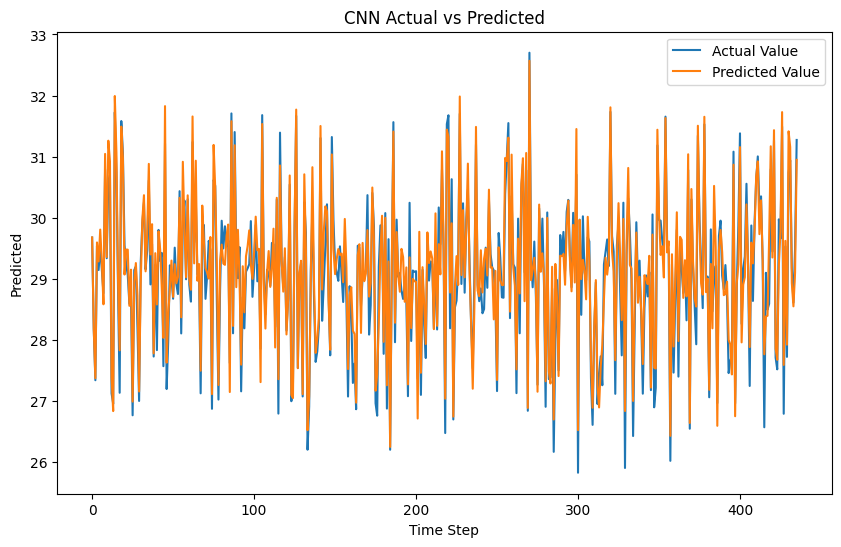

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test_inverse[:,1],label='Actual Value')
plt.plot(cpred_invers[:,1],label='Predicted Value')
plt.title("CNN Actual vs Predicted")
plt.xlabel('Time Step')
plt.ylabel('Predicted')
plt.legend()
plt.show()

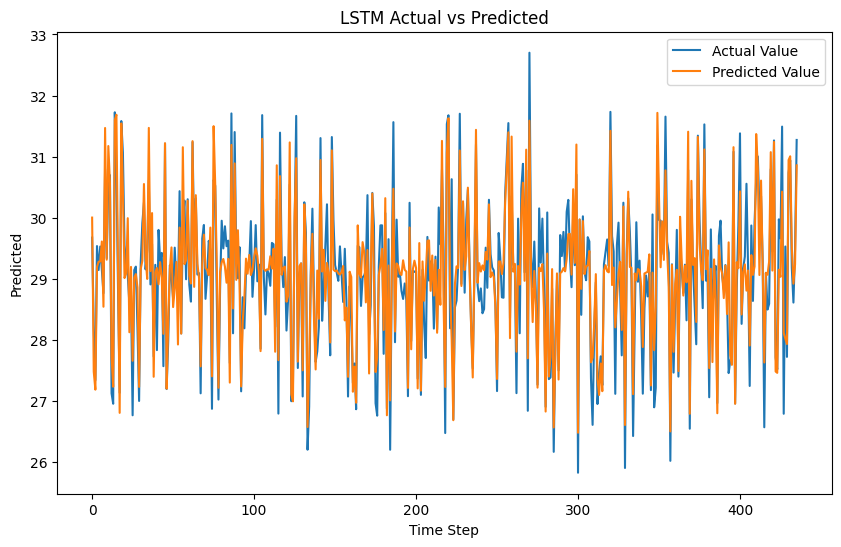

In [ ]:
plt.figure(figsize=(10,6))
plt.title('LSTM Actual vs Predicted')
plt.plot(y_test_inverse[:,1],label='Actual Value')
plt.plot(pred_inverse[:,1],label='Predicted Value')
plt.xlabel('Time Step')
plt.ylabel('Predicted')
plt.legend()
plt.show()

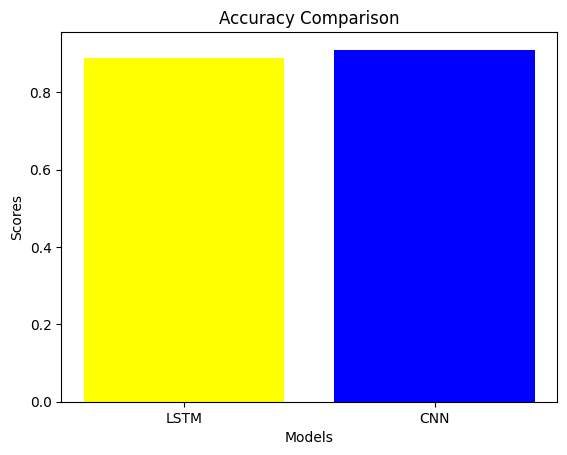

In [ ]:
x_values = ['LSTM','CNN']
y_values = [lacc,cacc]
plt.title('Accuracy Comparison')
plt.bar(x_values,y_values,color=['yellow','blue'])
plt.xlabel('Models')
plt.ylabel('Scores')
plt.show()

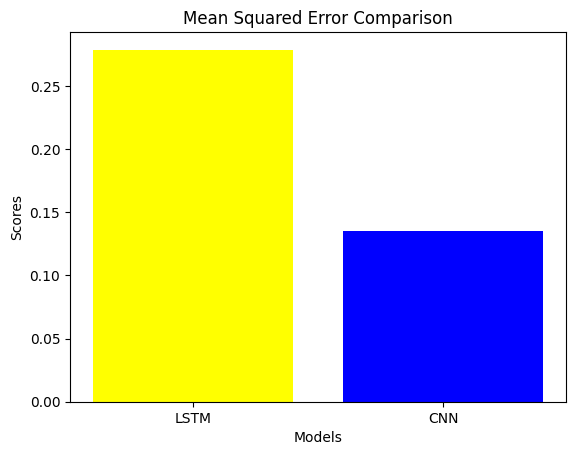

In [ ]:
x_values = ['LSTM','CNN']
y_values = [lmse,cmse]
plt.title('Mean Squared Error Comparison')
plt.bar(x_values,y_values,color=['yellow','blue'])
plt.xlabel('Models')
plt.ylabel('Scores')
plt.show()

In [ ]:
lscore = model.evaluate(X_train, y_train, verbose=0)  # Evaluate LSTM model
cscore = Model.evaluate(X_train, y_train, verbose=0) # Evaluate CNN model
print(f'LSTM Score (Loss): {lscore}')  # Print LSTM loss
print(f'CNN Score (Loss): {cscore}')  # Print CNN loss

LSTM Score (Loss): 0.00674288347363472
CNN Score (Loss): 0.0022541291546076536
